<center><h1>Processo seletivo RedFox - Data Science</h1></center>

Uma análise detalhada dos resultados destet notebook está no link para meu artigo <a href="https://www.linkedin.com/pulse/m%C3%A9tricas-para-algoritmos-de-machine-learning-i-bruno-borges-de-souza/">aqui</a>.
A base de dados que vamos usar aqui é a <b>Breast Cancer Data</b> e o repositório da base pode ser encontrado aqui. O câncer de mama é um dos canceres mais comuns entre as mulheres, sendo portanto um problema de saúde pública preocupante. O objetivo do classificador é prever se o câncer em questão é malino ou benigno dado uma série de variáveis que são:
<ul>

 <li>radius (raio - média das distâncias do centro para os pontos no perímetro) </li>
 <li>texture (textura - desvio padrão dos valores da escala de cinza) </li>
 <li>perimeter (perímetro) </li>
 <li>area (área) </li>
 <li>smoothness (suavidade - variação local em comprimentos de raio) </li>
 <li>compactness (compacidade - perímetro² / área - 1,0) </li>
 <li>concavity (concavidade - gravidade das porções côncavas do contorno) </li>
 <li>concave points (pontos côncavos - número de porções côncavas do contorno) </li>
 <li>symmetry (simetria) </li>
 <li>fractal dimension (dimensão fractal - “Aproximação costeira” - 1) </li>
</ul>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # for intractve graph
import random
import sklearn.metrics as metric
import warnings
warnings.filterwarnings("ignore")

In [36]:
base = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', sep=',', header=None)

In [37]:
preditores = ['id','diagnostic',' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst']
base.columns = preditores

In [38]:
previsores = base.drop(['id','diagnostic'], axis=1).values
classe = base['diagnostic'].values
labelencoder_classe = LabelEncoder() #converte para zeros e uns
classe = labelencoder_classe.fit_transform(classe)

base.isna().sum()

id                          0
diagnostic                  0
 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
dtype: int64

In [39]:
#normalização dos dados
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
pd.DataFrame(previsores).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,...,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02,5.69e+02
mean,-1.26e-16,1.05e-16,-1.27e-16,-1.90e-16,1.49e-16,2.54e-16,-1.34e-16,-8.43e-17,2.08e-16,5.41e-16,...,-7.99e-16,-1.83e-17,-4.02e-16,-2.85e-17,-2.19e-16,-2.58e-16,1.14e-16,2.83e-16,1.67e-16,2.32e-16
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,...,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-2.03e+00,-2.23e+00,-1.98e+00,-1.45e+00,-3.11e+00,-1.61e+00,-1.11e+00,-1.26e+00,-2.74e+00,-1.82e+00,...,-1.73e+00,-2.22e+00,-1.69e+00,-1.22e+00,-2.68e+00,-1.44e+00,-1.31e+00,-1.75e+00,-2.16e+00,-1.60e+00
25%,-6.89e-01,-7.26e-01,-6.92e-01,-6.67e-01,-7.11e-01,-7.47e-01,-7.44e-01,-7.38e-01,-7.03e-01,-7.23e-01,...,-6.75e-01,-7.49e-01,-6.90e-01,-6.42e-01,-6.91e-01,-6.81e-01,-7.57e-01,-7.56e-01,-6.42e-01,-6.92e-01
50%,-2.15e-01,-1.05e-01,-2.36e-01,-2.95e-01,-3.49e-02,-2.22e-01,-3.42e-01,-3.98e-01,-7.16e-02,-1.78e-01,...,-2.69e-01,-4.35e-02,-2.86e-01,-3.41e-01,-4.68e-02,-2.70e-01,-2.18e-01,-2.23e-01,-1.27e-01,-2.16e-01
75%,4.69e-01,5.84e-01,5.00e-01,3.64e-01,6.36e-01,4.94e-01,5.26e-01,6.47e-01,5.31e-01,4.71e-01,...,5.22e-01,6.58e-01,5.40e-01,3.58e-01,5.98e-01,5.40e-01,5.31e-01,7.13e-01,4.50e-01,4.51e-01
max,3.97e+00,4.65e+00,3.98e+00,5.25e+00,4.77e+00,4.57e+00,4.24e+00,3.93e+00,4.48e+00,4.91e+00,...,4.09e+00,3.89e+00,4.29e+00,5.93e+00,3.96e+00,5.11e+00,4.70e+00,2.69e+00,6.05e+00,6.85e+00


<Figure size 432x288 with 0 Axes>

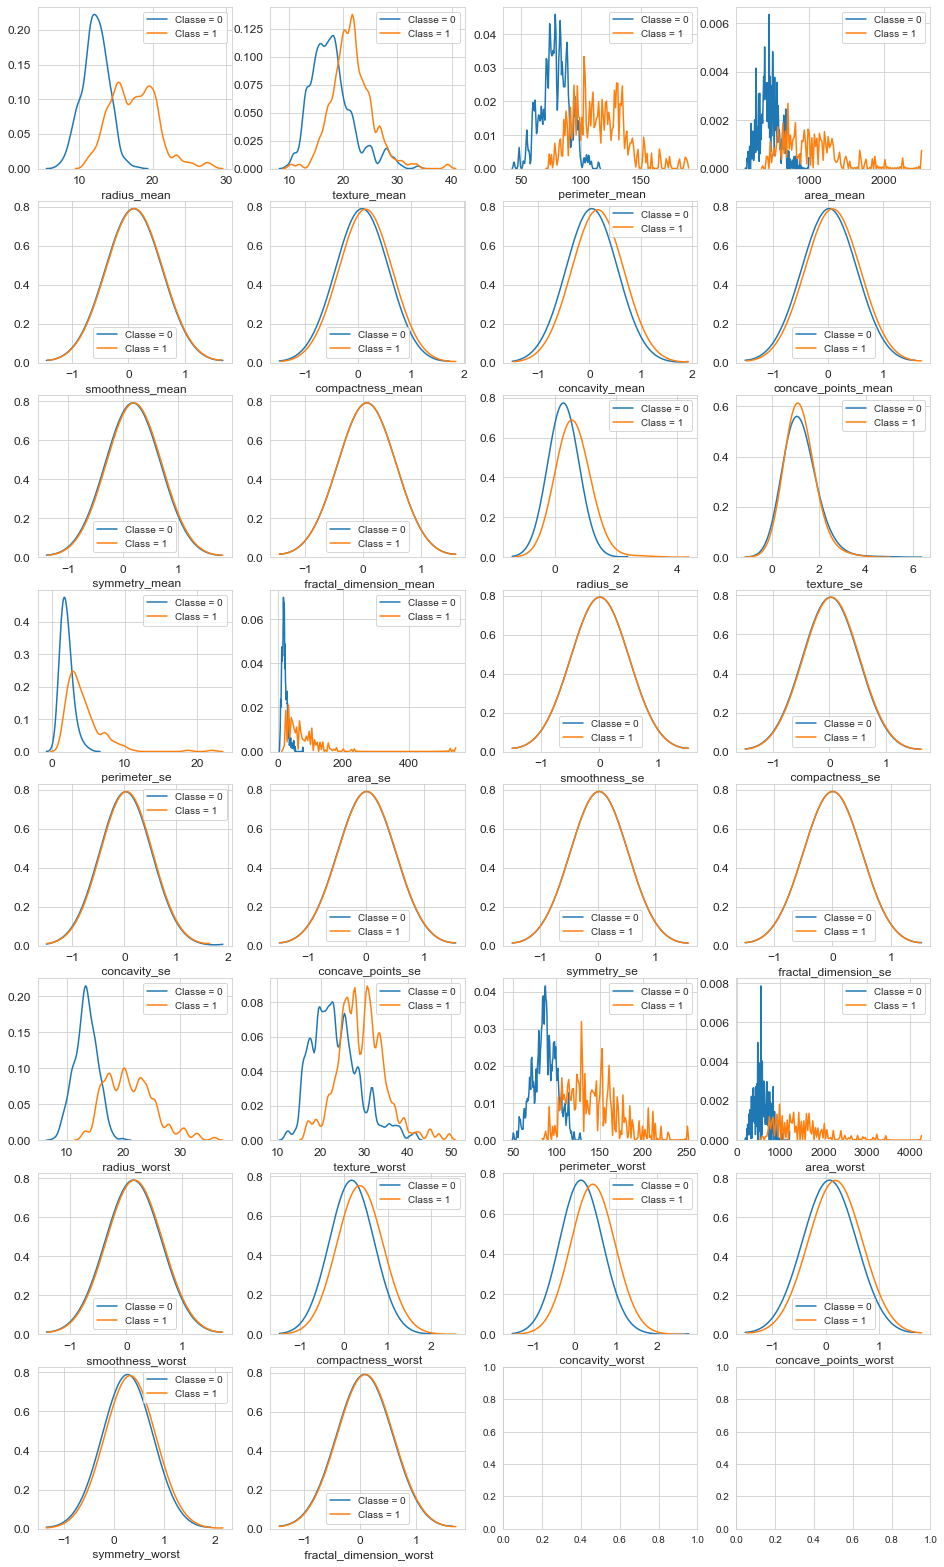

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns # for intractve graph
i = 0
t0 = base.loc[classe == 0]
t1 = base.loc[classe == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
preditores2 = [' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst']
for feature in preditores2:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Classe = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [41]:
f1 = GaussianNB() #Naive Nayes
f2 = DecisionTreeClassifier() #Árvore de decisão
f3 = LogisticRegression() #Regressão Logística
f4 = SVC(kernel = 'rbf', random_state = 1, C = 2.0) #SVM - kernel RBF e penalidade=2
f5 = SVC(kernel = 'linear', random_state = 1, C = 2.0) #SVM - kernel linear e penalidade=2
f6 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2) #KNN com 5 vizinhos e usando distância euclidiana
#Random forest com 40 árvores e critério entropy para pureza
f7 = RandomForestClassifier(verbose=1, n_estimators=40, criterion='entropy', random_state=0)
#XGBoost com 100 estimadores com objetivo binário logístico e profundidade 10
f8 = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
#Rede neural com duas camsdas, camada oculta com 100 neurônios, função de ativação ReLu
#tamanho do batch=200
f9 = MLPClassifier(verbose = True, max_iter = 1000,
                              tol = 0.00001, solver='adam',
                              hidden_layer_sizes=(100), activation = 'relu',
                              batch_size=200, learning_rate_init=0.001)
#Rede neural com duas camsdas, camada oculta com 100 neurônios, função de ativação Logística
#tamanho do batch=200
f10 = MLPClassifier(verbose = True, max_iter = 1000,
                              tol = 0.00001, solver='adam',
                              hidden_layer_sizes=(100), activation = 'logistic',
                              batch_size=200, learning_rate_init=0.001)
classificador=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]

In [42]:
#todas as métricas
Acurácia, Precisão, Sensibilidade, F1, ROC, Kappa, Jaccard, LogLoss = [[],[],[],[],[],[],[],[]]
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1234) #divisão com embaralhamento
for i in range(len(classificador)):
#Para cada classificador aplico a validação cruzada 
     for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(classe.shape[0], 1))):
     #aplico as métricas para cada uma das bases de teste da validação cruzada
         previsões=np.zeros(shape=(indice_teste.shape[0], len(classificador)))
         classificador[i].fit(previsores[indice_treinamento], classe[indice_treinamento])
         previsões[:,i] = classificador[i].predict(previsores[indice_teste])
         Acurácia.append(metric.accuracy_score(classe[indice_teste], previsões[:,i]))
         Precisão.append(metric.precision_score(classe[indice_teste], previsões[:,i]))
         Sensibilidade.append(metric.recall_score(classe[indice_teste], previsões[:,i]))
         F1.append(metric.f1_score(classe[indice_teste], previsões[:,i]))
         ROC.append(metric.roc_auc_score(classe[indice_teste], previsões[:,i]))
         Kappa.append(metric.cohen_kappa_score(classe[indice_teste], previsões[:,i]))
         Jaccard.append(metric.jaccard_similarity_score(classe[indice_teste], previsões[:,i]))
         LogLoss.append(metric.log_loss(classe[indice_teste], previsões[:,i]))    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Iteration 1, loss = 0.63582589
Iteration 2, loss = 0.51193410
Iteration 3, loss = 0.42275272
Iteration 4, loss = 0.35300213
Iteration 5, loss = 0.30360894
Iteration 6, loss = 0.26515346
Iteration 7, loss = 0.23614163
Iteration 8, loss = 0.21331114
Iteration 9, loss = 0.19511553
Iteration 10, loss = 0.18079004
Iteration 11, loss = 0.16824780
Iteration 12, loss = 0.15850855
Iteration 13, loss = 0.15053221
Iteration 14, loss = 0.14328343
Iteration 15, loss = 0.13704443
Iteration 16, loss = 0.13165412
Iteration 17, loss = 0.12684687
Iteration 18, loss = 0.12257224
Iteration 19, loss = 0.11868182
Iteration 20, loss = 0.11513171
Iteration 21, loss = 0.11193007
Iteration 22, loss = 0.10890456
Iteration 23, loss = 0.10599711
Iteration 24, loss = 0.10347368
Iteration 25, loss = 0.10101249
Iteration 26, loss = 0.09866787
Iteration 27, loss = 0.09649806
Iteration 28, loss = 0.09435629
Iteration 29, loss = 0.09246157
Iteration 30, loss = 0.09057237
Iteration 31, loss = 0.08885196
Iteration 32, los

Iteration 260, loss = 0.01196561
Iteration 261, loss = 0.01187459
Iteration 262, loss = 0.01180253
Iteration 263, loss = 0.01171145
Iteration 264, loss = 0.01164207
Iteration 265, loss = 0.01157138
Iteration 266, loss = 0.01149429
Iteration 267, loss = 0.01141545
Iteration 268, loss = 0.01133711
Iteration 269, loss = 0.01126041
Iteration 270, loss = 0.01118337
Iteration 271, loss = 0.01109984
Iteration 272, loss = 0.01103993
Iteration 273, loss = 0.01096363
Iteration 274, loss = 0.01088563
Iteration 275, loss = 0.01083419
Iteration 276, loss = 0.01075015
Iteration 277, loss = 0.01068309
Iteration 278, loss = 0.01059874
Iteration 279, loss = 0.01053215
Iteration 280, loss = 0.01046763
Iteration 281, loss = 0.01038934
Iteration 282, loss = 0.01033748
Iteration 283, loss = 0.01025493
Iteration 284, loss = 0.01019864
Iteration 285, loss = 0.01013372
Iteration 286, loss = 0.01003870
Iteration 287, loss = 0.01004337
Iteration 288, loss = 0.00996993
Iteration 289, loss = 0.00991131
Iteration 

Iteration 518, loss = 0.00291690
Iteration 519, loss = 0.00290447
Iteration 520, loss = 0.00289209
Iteration 521, loss = 0.00287942
Iteration 522, loss = 0.00287074
Iteration 523, loss = 0.00285741
Iteration 524, loss = 0.00285023
Iteration 525, loss = 0.00282861
Iteration 526, loss = 0.00282020
Iteration 527, loss = 0.00280977
Iteration 528, loss = 0.00279143
Iteration 529, loss = 0.00277837
Iteration 530, loss = 0.00277211
Iteration 531, loss = 0.00275506
Iteration 532, loss = 0.00274566
Iteration 533, loss = 0.00273794
Iteration 534, loss = 0.00272343
Iteration 535, loss = 0.00270793
Iteration 536, loss = 0.00269451
Iteration 537, loss = 0.00268497
Iteration 538, loss = 0.00267625
Iteration 539, loss = 0.00267262
Iteration 540, loss = 0.00264999
Iteration 541, loss = 0.00263537
Iteration 542, loss = 0.00262739
Iteration 543, loss = 0.00261812
Iteration 544, loss = 0.00260446
Iteration 545, loss = 0.00258805
Iteration 546, loss = 0.00257708
Iteration 547, loss = 0.00256478
Iteration 

Iteration 195, loss = 0.01879643
Iteration 196, loss = 0.01869754
Iteration 197, loss = 0.01859614
Iteration 198, loss = 0.01845235
Iteration 199, loss = 0.01834703
Iteration 200, loss = 0.01827995
Iteration 201, loss = 0.01813474
Iteration 202, loss = 0.01802942
Iteration 203, loss = 0.01791870
Iteration 204, loss = 0.01781984
Iteration 205, loss = 0.01771950
Iteration 206, loss = 0.01763184
Iteration 207, loss = 0.01750727
Iteration 208, loss = 0.01738620
Iteration 209, loss = 0.01727279
Iteration 210, loss = 0.01717841
Iteration 211, loss = 0.01707988
Iteration 212, loss = 0.01697587
Iteration 213, loss = 0.01688882
Iteration 214, loss = 0.01679174
Iteration 215, loss = 0.01667468
Iteration 216, loss = 0.01659051
Iteration 217, loss = 0.01648030
Iteration 218, loss = 0.01639125
Iteration 219, loss = 0.01629634
Iteration 220, loss = 0.01618972
Iteration 221, loss = 0.01608997
Iteration 222, loss = 0.01601035
Iteration 223, loss = 0.01589907
Iteration 224, loss = 0.01580395
Iteration 

Iteration 496, loss = 0.00376782
Iteration 497, loss = 0.00375015
Iteration 498, loss = 0.00372888
Iteration 499, loss = 0.00371669
Iteration 500, loss = 0.00369316
Iteration 501, loss = 0.00367906
Iteration 502, loss = 0.00366380
Iteration 503, loss = 0.00364039
Iteration 504, loss = 0.00362426
Iteration 505, loss = 0.00360467
Iteration 506, loss = 0.00359376
Iteration 507, loss = 0.00357236
Iteration 508, loss = 0.00355578
Iteration 509, loss = 0.00353637
Iteration 510, loss = 0.00352230
Iteration 511, loss = 0.00350694
Iteration 512, loss = 0.00349470
Iteration 513, loss = 0.00347949
Iteration 514, loss = 0.00346095
Iteration 515, loss = 0.00345316
Iteration 516, loss = 0.00343166
Iteration 517, loss = 0.00341614
Iteration 518, loss = 0.00340222
Iteration 519, loss = 0.00338531
Iteration 520, loss = 0.00337050
Iteration 521, loss = 0.00335889
Iteration 522, loss = 0.00333931
Iteration 523, loss = 0.00332347
Iteration 524, loss = 0.00331180
Iteration 525, loss = 0.00329729
Iteration 

Iteration 136, loss = 0.03361097
Iteration 137, loss = 0.03338370
Iteration 138, loss = 0.03317397
Iteration 139, loss = 0.03295397
Iteration 140, loss = 0.03272663
Iteration 141, loss = 0.03253030
Iteration 142, loss = 0.03229829
Iteration 143, loss = 0.03209758
Iteration 144, loss = 0.03190335
Iteration 145, loss = 0.03170665
Iteration 146, loss = 0.03145833
Iteration 147, loss = 0.03126125
Iteration 148, loss = 0.03103689
Iteration 149, loss = 0.03087212
Iteration 150, loss = 0.03064745
Iteration 151, loss = 0.03042515
Iteration 152, loss = 0.03025880
Iteration 153, loss = 0.03003057
Iteration 154, loss = 0.02990931
Iteration 155, loss = 0.02964121
Iteration 156, loss = 0.02941356
Iteration 157, loss = 0.02924203
Iteration 158, loss = 0.02906125
Iteration 159, loss = 0.02887288
Iteration 160, loss = 0.02867002
Iteration 161, loss = 0.02850301
Iteration 162, loss = 0.02831543
Iteration 163, loss = 0.02812393
Iteration 164, loss = 0.02794701
Iteration 165, loss = 0.02777002
Iteration 

Iteration 434, loss = 0.00544308
Iteration 435, loss = 0.00543605
Iteration 436, loss = 0.00539941
Iteration 437, loss = 0.00536960
Iteration 438, loss = 0.00534862
Iteration 439, loss = 0.00530834
Iteration 440, loss = 0.00528795
Iteration 441, loss = 0.00524512
Iteration 442, loss = 0.00523939
Iteration 443, loss = 0.00520960
Iteration 444, loss = 0.00519078
Iteration 445, loss = 0.00516748
Iteration 446, loss = 0.00512945
Iteration 447, loss = 0.00509297
Iteration 448, loss = 0.00507489
Iteration 449, loss = 0.00507246
Iteration 450, loss = 0.00503851
Iteration 451, loss = 0.00500377
Iteration 452, loss = 0.00497931
Iteration 453, loss = 0.00496105
Iteration 454, loss = 0.00492930
Iteration 455, loss = 0.00490531
Iteration 456, loss = 0.00487519
Iteration 457, loss = 0.00485376
Iteration 458, loss = 0.00483008
Iteration 459, loss = 0.00481433
Iteration 460, loss = 0.00477977
Iteration 461, loss = 0.00476099
Iteration 462, loss = 0.00473418
Iteration 463, loss = 0.00471603
Iteration 

Iteration 45, loss = 0.08187190
Iteration 46, loss = 0.08071657
Iteration 47, loss = 0.07972010
Iteration 48, loss = 0.07860602
Iteration 49, loss = 0.07764197
Iteration 50, loss = 0.07667491
Iteration 51, loss = 0.07572785
Iteration 52, loss = 0.07484433
Iteration 53, loss = 0.07395548
Iteration 54, loss = 0.07313778
Iteration 55, loss = 0.07235075
Iteration 56, loss = 0.07155043
Iteration 57, loss = 0.07079269
Iteration 58, loss = 0.07002969
Iteration 59, loss = 0.06931643
Iteration 60, loss = 0.06863807
Iteration 61, loss = 0.06796831
Iteration 62, loss = 0.06727104
Iteration 63, loss = 0.06664301
Iteration 64, loss = 0.06601387
Iteration 65, loss = 0.06542208
Iteration 66, loss = 0.06481053
Iteration 67, loss = 0.06420803
Iteration 68, loss = 0.06367836
Iteration 69, loss = 0.06309809
Iteration 70, loss = 0.06254028
Iteration 71, loss = 0.06203495
Iteration 72, loss = 0.06150912
Iteration 73, loss = 0.06098543
Iteration 74, loss = 0.06048989
Iteration 75, loss = 0.06002068
Iteratio

Iteration 349, loss = 0.01236616
Iteration 350, loss = 0.01229444
Iteration 351, loss = 0.01222128
Iteration 352, loss = 0.01217393
Iteration 353, loss = 0.01211585
Iteration 354, loss = 0.01205825
Iteration 355, loss = 0.01199500
Iteration 356, loss = 0.01193336
Iteration 357, loss = 0.01191102
Iteration 358, loss = 0.01181116
Iteration 359, loss = 0.01175738
Iteration 360, loss = 0.01168973
Iteration 361, loss = 0.01163893
Iteration 362, loss = 0.01159053
Iteration 363, loss = 0.01152395
Iteration 364, loss = 0.01151350
Iteration 365, loss = 0.01141704
Iteration 366, loss = 0.01135317
Iteration 367, loss = 0.01131730
Iteration 368, loss = 0.01124911
Iteration 369, loss = 0.01117979
Iteration 370, loss = 0.01112135
Iteration 371, loss = 0.01107037
Iteration 372, loss = 0.01101520
Iteration 373, loss = 0.01096411
Iteration 374, loss = 0.01091544
Iteration 375, loss = 0.01086690
Iteration 376, loss = 0.01080832
Iteration 377, loss = 0.01075291
Iteration 378, loss = 0.01070838
Iteration 

Iteration 657, loss = 0.00329707
Iteration 658, loss = 0.00327997
Iteration 659, loss = 0.00327198
Iteration 660, loss = 0.00325874
Iteration 661, loss = 0.00324576
Iteration 662, loss = 0.00323686
Iteration 663, loss = 0.00322876
Iteration 664, loss = 0.00320976
Iteration 665, loss = 0.00320163
Iteration 666, loss = 0.00319675
Iteration 667, loss = 0.00318079
Iteration 668, loss = 0.00317679
Iteration 669, loss = 0.00315563
Iteration 670, loss = 0.00314980
Iteration 671, loss = 0.00313351
Iteration 672, loss = 0.00312039
Iteration 673, loss = 0.00311014
Iteration 674, loss = 0.00310302
Iteration 675, loss = 0.00309274
Iteration 676, loss = 0.00308038
Iteration 677, loss = 0.00307306
Iteration 678, loss = 0.00306115
Iteration 679, loss = 0.00304923
Iteration 680, loss = 0.00303686
Iteration 681, loss = 0.00302765
Iteration 682, loss = 0.00302204
Iteration 683, loss = 0.00300845
Iteration 684, loss = 0.00299840
Iteration 685, loss = 0.00298615
Iteration 686, loss = 0.00297685
Iteration 

Iteration 155, loss = 0.03012440
Iteration 156, loss = 0.03000105
Iteration 157, loss = 0.02969492
Iteration 158, loss = 0.02952353
Iteration 159, loss = 0.02931222
Iteration 160, loss = 0.02912793
Iteration 161, loss = 0.02890502
Iteration 162, loss = 0.02871931
Iteration 163, loss = 0.02853406
Iteration 164, loss = 0.02837081
Iteration 165, loss = 0.02819080
Iteration 166, loss = 0.02799046
Iteration 167, loss = 0.02779733
Iteration 168, loss = 0.02759277
Iteration 169, loss = 0.02741100
Iteration 170, loss = 0.02726261
Iteration 171, loss = 0.02707190
Iteration 172, loss = 0.02690071
Iteration 173, loss = 0.02667934
Iteration 174, loss = 0.02652062
Iteration 175, loss = 0.02634041
Iteration 176, loss = 0.02616569
Iteration 177, loss = 0.02598318
Iteration 178, loss = 0.02582532
Iteration 179, loss = 0.02565947
Iteration 180, loss = 0.02547077
Iteration 181, loss = 0.02532965
Iteration 182, loss = 0.02513412
Iteration 183, loss = 0.02497939
Iteration 184, loss = 0.02478420
Iteration 

Iteration 457, loss = 0.00532999
Iteration 458, loss = 0.00529638
Iteration 459, loss = 0.00527125
Iteration 460, loss = 0.00523584
Iteration 461, loss = 0.00522990
Iteration 462, loss = 0.00519985
Iteration 463, loss = 0.00517055
Iteration 464, loss = 0.00515408
Iteration 465, loss = 0.00512515
Iteration 466, loss = 0.00510771
Iteration 467, loss = 0.00507201
Iteration 468, loss = 0.00505310
Iteration 469, loss = 0.00502022
Iteration 470, loss = 0.00500214
Iteration 471, loss = 0.00498244
Iteration 472, loss = 0.00496439
Iteration 473, loss = 0.00494066
Iteration 474, loss = 0.00490423
Iteration 475, loss = 0.00490111
Iteration 476, loss = 0.00488517
Iteration 477, loss = 0.00484089
Iteration 478, loss = 0.00483075
Iteration 479, loss = 0.00481283
Iteration 480, loss = 0.00477869
Iteration 481, loss = 0.00475597
Iteration 482, loss = 0.00474212
Iteration 483, loss = 0.00472332
Iteration 484, loss = 0.00468912
Iteration 485, loss = 0.00467003
Iteration 486, loss = 0.00465693
Iteration 

Iteration 95, loss = 0.04548813
Iteration 96, loss = 0.04514324
Iteration 97, loss = 0.04479529
Iteration 98, loss = 0.04445387
Iteration 99, loss = 0.04410561
Iteration 100, loss = 0.04384175
Iteration 101, loss = 0.04347769
Iteration 102, loss = 0.04317652
Iteration 103, loss = 0.04292818
Iteration 104, loss = 0.04260080
Iteration 105, loss = 0.04222997
Iteration 106, loss = 0.04194178
Iteration 107, loss = 0.04159828
Iteration 108, loss = 0.04134279
Iteration 109, loss = 0.04105226
Iteration 110, loss = 0.04072320
Iteration 111, loss = 0.04045208
Iteration 112, loss = 0.04012917
Iteration 113, loss = 0.03984037
Iteration 114, loss = 0.03957630
Iteration 115, loss = 0.03923760
Iteration 116, loss = 0.03900369
Iteration 117, loss = 0.03866041
Iteration 118, loss = 0.03842128
Iteration 119, loss = 0.03813097
Iteration 120, loss = 0.03786502
Iteration 121, loss = 0.03756649
Iteration 122, loss = 0.03733107
Iteration 123, loss = 0.03703924
Iteration 124, loss = 0.03679255
Iteration 125, 

Iteration 370, loss = 0.00804944
Iteration 371, loss = 0.00800099
Iteration 372, loss = 0.00796810
Iteration 373, loss = 0.00793705
Iteration 374, loss = 0.00787963
Iteration 375, loss = 0.00786335
Iteration 376, loss = 0.00780613
Iteration 377, loss = 0.00777838
Iteration 378, loss = 0.00772147
Iteration 379, loss = 0.00769463
Iteration 380, loss = 0.00765689
Iteration 381, loss = 0.00761306
Iteration 382, loss = 0.00757472
Iteration 383, loss = 0.00753706
Iteration 384, loss = 0.00749746
Iteration 385, loss = 0.00745686
Iteration 386, loss = 0.00744005
Iteration 387, loss = 0.00738905
Iteration 388, loss = 0.00735808
Iteration 389, loss = 0.00730730
Iteration 390, loss = 0.00728469
Iteration 391, loss = 0.00723824
Iteration 392, loss = 0.00720794
Iteration 393, loss = 0.00716969
Iteration 394, loss = 0.00713432
Iteration 395, loss = 0.00709598
Iteration 396, loss = 0.00706787
Iteration 397, loss = 0.00704462
Iteration 398, loss = 0.00701639
Iteration 399, loss = 0.00698330
Iteration 

Iteration 661, loss = 0.00236628
Iteration 662, loss = 0.00236141
Iteration 663, loss = 0.00234703
Iteration 664, loss = 0.00233997
Iteration 665, loss = 0.00233429
Iteration 666, loss = 0.00232409
Iteration 667, loss = 0.00231205
Iteration 668, loss = 0.00230696
Iteration 669, loss = 0.00229915
Iteration 670, loss = 0.00229130
Iteration 671, loss = 0.00228138
Iteration 672, loss = 0.00227516
Iteration 673, loss = 0.00226392
Iteration 674, loss = 0.00225724
Iteration 675, loss = 0.00225195
Iteration 676, loss = 0.00223921
Iteration 677, loss = 0.00223540
Iteration 678, loss = 0.00224283
Iteration 679, loss = 0.00222017
Iteration 680, loss = 0.00220821
Iteration 681, loss = 0.00220426
Iteration 682, loss = 0.00219565
Iteration 683, loss = 0.00218821
Iteration 684, loss = 0.00218228
Iteration 685, loss = 0.00217087
Iteration 686, loss = 0.00216751
Iteration 687, loss = 0.00215342
Iteration 688, loss = 0.00215814
Iteration 689, loss = 0.00213886
Iteration 690, loss = 0.00212875
Iteration 

Iteration 237, loss = 0.01867338
Iteration 238, loss = 0.01856127
Iteration 239, loss = 0.01844617
Iteration 240, loss = 0.01832087
Iteration 241, loss = 0.01820981
Iteration 242, loss = 0.01814199
Iteration 243, loss = 0.01801061
Iteration 244, loss = 0.01792571
Iteration 245, loss = 0.01778981
Iteration 246, loss = 0.01767547
Iteration 247, loss = 0.01756605
Iteration 248, loss = 0.01746382
Iteration 249, loss = 0.01736304
Iteration 250, loss = 0.01727232
Iteration 251, loss = 0.01714879
Iteration 252, loss = 0.01700678
Iteration 253, loss = 0.01693317
Iteration 254, loss = 0.01683433
Iteration 255, loss = 0.01674511
Iteration 256, loss = 0.01663953
Iteration 257, loss = 0.01651988
Iteration 258, loss = 0.01643499
Iteration 259, loss = 0.01634460
Iteration 260, loss = 0.01624666
Iteration 261, loss = 0.01616788
Iteration 262, loss = 0.01608324
Iteration 263, loss = 0.01596493
Iteration 264, loss = 0.01591783
Iteration 265, loss = 0.01576709
Iteration 266, loss = 0.01568610
Iteration 

Iteration 548, loss = 0.00388200
Iteration 549, loss = 0.00385134
Iteration 550, loss = 0.00383908
Iteration 551, loss = 0.00382835
Iteration 552, loss = 0.00380807
Iteration 553, loss = 0.00378905
Iteration 554, loss = 0.00378300
Iteration 555, loss = 0.00376234
Iteration 556, loss = 0.00374526
Iteration 557, loss = 0.00373044
Iteration 558, loss = 0.00370662
Iteration 559, loss = 0.00373571
Iteration 560, loss = 0.00370363
Iteration 561, loss = 0.00367241
Iteration 562, loss = 0.00366461
Iteration 563, loss = 0.00363999
Iteration 564, loss = 0.00361942
Iteration 565, loss = 0.00360311
Iteration 566, loss = 0.00360911
Iteration 567, loss = 0.00357498
Iteration 568, loss = 0.00356561
Iteration 569, loss = 0.00355625
Iteration 570, loss = 0.00353490
Iteration 571, loss = 0.00351504
Iteration 572, loss = 0.00350233
Iteration 573, loss = 0.00348761
Iteration 574, loss = 0.00348340
Iteration 575, loss = 0.00346688
Iteration 576, loss = 0.00345214
Iteration 577, loss = 0.00343366
Iteration 

Iteration 85, loss = 0.04928351
Iteration 86, loss = 0.04885223
Iteration 87, loss = 0.04858289
Iteration 88, loss = 0.04810796
Iteration 89, loss = 0.04774737
Iteration 90, loss = 0.04735300
Iteration 91, loss = 0.04692153
Iteration 92, loss = 0.04657201
Iteration 93, loss = 0.04619614
Iteration 94, loss = 0.04586598
Iteration 95, loss = 0.04546690
Iteration 96, loss = 0.04511321
Iteration 97, loss = 0.04477631
Iteration 98, loss = 0.04443179
Iteration 99, loss = 0.04412050
Iteration 100, loss = 0.04376909
Iteration 101, loss = 0.04339543
Iteration 102, loss = 0.04306906
Iteration 103, loss = 0.04279933
Iteration 104, loss = 0.04242186
Iteration 105, loss = 0.04210002
Iteration 106, loss = 0.04175980
Iteration 107, loss = 0.04144829
Iteration 108, loss = 0.04118728
Iteration 109, loss = 0.04084431
Iteration 110, loss = 0.04052599
Iteration 111, loss = 0.04022372
Iteration 112, loss = 0.03991688
Iteration 113, loss = 0.03965953
Iteration 114, loss = 0.03935280
Iteration 115, loss = 0.0

Iteration 389, loss = 0.00647244
Iteration 390, loss = 0.00643812
Iteration 391, loss = 0.00639516
Iteration 392, loss = 0.00635938
Iteration 393, loss = 0.00633591
Iteration 394, loss = 0.00630211
Iteration 395, loss = 0.00626789
Iteration 396, loss = 0.00623188
Iteration 397, loss = 0.00620896
Iteration 398, loss = 0.00616598
Iteration 399, loss = 0.00613588
Iteration 400, loss = 0.00611061
Iteration 401, loss = 0.00607477
Iteration 402, loss = 0.00604111
Iteration 403, loss = 0.00601010
Iteration 404, loss = 0.00598116
Iteration 405, loss = 0.00594652
Iteration 406, loss = 0.00591207
Iteration 407, loss = 0.00590653
Iteration 408, loss = 0.00586066
Iteration 409, loss = 0.00582623
Iteration 410, loss = 0.00579817
Iteration 411, loss = 0.00576676
Iteration 412, loss = 0.00573729
Iteration 413, loss = 0.00571550
Iteration 414, loss = 0.00568470
Iteration 415, loss = 0.00565103
Iteration 416, loss = 0.00562194
Iteration 417, loss = 0.00558940
Iteration 418, loss = 0.00556581
Iteration 

Iteration 6, loss = 0.29662656
Iteration 7, loss = 0.26292451
Iteration 8, loss = 0.23663918
Iteration 9, loss = 0.21484042
Iteration 10, loss = 0.19802813
Iteration 11, loss = 0.18299473
Iteration 12, loss = 0.17144351
Iteration 13, loss = 0.16117540
Iteration 14, loss = 0.15254054
Iteration 15, loss = 0.14508932
Iteration 16, loss = 0.13859140
Iteration 17, loss = 0.13282048
Iteration 18, loss = 0.12774333
Iteration 19, loss = 0.12302683
Iteration 20, loss = 0.11875172
Iteration 21, loss = 0.11505048
Iteration 22, loss = 0.11150825
Iteration 23, loss = 0.10833460
Iteration 24, loss = 0.10533227
Iteration 25, loss = 0.10249554
Iteration 26, loss = 0.09992313
Iteration 27, loss = 0.09746449
Iteration 28, loss = 0.09515216
Iteration 29, loss = 0.09303050
Iteration 30, loss = 0.09095772
Iteration 31, loss = 0.08911307
Iteration 32, loss = 0.08729342
Iteration 33, loss = 0.08546020
Iteration 34, loss = 0.08389191
Iteration 35, loss = 0.08230821
Iteration 36, loss = 0.08086284
Iteration 37

Iteration 310, loss = 0.00928504
Iteration 311, loss = 0.00922795
Iteration 312, loss = 0.00919040
Iteration 313, loss = 0.00912935
Iteration 314, loss = 0.00907545
Iteration 315, loss = 0.00901886
Iteration 316, loss = 0.00897420
Iteration 317, loss = 0.00891849
Iteration 318, loss = 0.00887781
Iteration 319, loss = 0.00881922
Iteration 320, loss = 0.00877614
Iteration 321, loss = 0.00871353
Iteration 322, loss = 0.00866353
Iteration 323, loss = 0.00860891
Iteration 324, loss = 0.00855672
Iteration 325, loss = 0.00851284
Iteration 326, loss = 0.00846441
Iteration 327, loss = 0.00842103
Iteration 328, loss = 0.00838978
Iteration 329, loss = 0.00832917
Iteration 330, loss = 0.00829777
Iteration 331, loss = 0.00823403
Iteration 332, loss = 0.00818807
Iteration 333, loss = 0.00813801
Iteration 334, loss = 0.00810623
Iteration 335, loss = 0.00804594
Iteration 336, loss = 0.00800776
Iteration 337, loss = 0.00796600
Iteration 338, loss = 0.00790974
Iteration 339, loss = 0.00787743
Iteration 

Iteration 601, loss = 0.00230846
Iteration 602, loss = 0.00229591
Iteration 603, loss = 0.00228483
Iteration 604, loss = 0.00227906
Iteration 605, loss = 0.00227061
Iteration 606, loss = 0.00225782
Iteration 607, loss = 0.00224779
Iteration 608, loss = 0.00223719
Iteration 609, loss = 0.00223541
Iteration 610, loss = 0.00222387
Iteration 611, loss = 0.00221613
Iteration 612, loss = 0.00220565
Iteration 613, loss = 0.00219404
Iteration 614, loss = 0.00219013
Iteration 615, loss = 0.00217737
Iteration 616, loss = 0.00217037
Iteration 617, loss = 0.00216291
Iteration 618, loss = 0.00215107
Iteration 619, loss = 0.00214742
Iteration 620, loss = 0.00213968
Iteration 621, loss = 0.00213014
Iteration 622, loss = 0.00211682
Iteration 623, loss = 0.00211134
Iteration 624, loss = 0.00210395
Iteration 625, loss = 0.00209542
Iteration 626, loss = 0.00208855
Iteration 627, loss = 0.00207581
Iteration 628, loss = 0.00207074
Iteration 629, loss = 0.00206551
Iteration 630, loss = 0.00205390
Iteration 

Iteration 211, loss = 0.01627338
Iteration 212, loss = 0.01616243
Iteration 213, loss = 0.01605263
Iteration 214, loss = 0.01592272
Iteration 215, loss = 0.01581001
Iteration 216, loss = 0.01570139
Iteration 217, loss = 0.01557830
Iteration 218, loss = 0.01547017
Iteration 219, loss = 0.01534835
Iteration 220, loss = 0.01525056
Iteration 221, loss = 0.01514754
Iteration 222, loss = 0.01504939
Iteration 223, loss = 0.01493628
Iteration 224, loss = 0.01484410
Iteration 225, loss = 0.01473902
Iteration 226, loss = 0.01461823
Iteration 227, loss = 0.01452124
Iteration 228, loss = 0.01441745
Iteration 229, loss = 0.01433422
Iteration 230, loss = 0.01424757
Iteration 231, loss = 0.01415700
Iteration 232, loss = 0.01408146
Iteration 233, loss = 0.01397133
Iteration 234, loss = 0.01386461
Iteration 235, loss = 0.01375434
Iteration 236, loss = 0.01365019
Iteration 237, loss = 0.01355540
Iteration 238, loss = 0.01346947
Iteration 239, loss = 0.01336607
Iteration 240, loss = 0.01328510
Iteration 

Iteration 507, loss = 0.00279880
Iteration 508, loss = 0.00278870
Iteration 509, loss = 0.00277578
Iteration 510, loss = 0.00276542
Iteration 511, loss = 0.00275078
Iteration 512, loss = 0.00273383
Iteration 513, loss = 0.00272367
Iteration 514, loss = 0.00271273
Iteration 515, loss = 0.00270082
Iteration 516, loss = 0.00268502
Iteration 517, loss = 0.00267597
Iteration 518, loss = 0.00265845
Iteration 519, loss = 0.00264968
Iteration 520, loss = 0.00263624
Iteration 521, loss = 0.00262507
Iteration 522, loss = 0.00260986
Iteration 523, loss = 0.00259980
Iteration 524, loss = 0.00259085
Iteration 525, loss = 0.00258108
Iteration 526, loss = 0.00256454
Iteration 527, loss = 0.00255249
Iteration 528, loss = 0.00254137
Iteration 529, loss = 0.00253087
Iteration 530, loss = 0.00251907
Iteration 531, loss = 0.00251144
Iteration 532, loss = 0.00249700
Iteration 533, loss = 0.00248518
Iteration 534, loss = 0.00247513
Iteration 535, loss = 0.00246368
Iteration 536, loss = 0.00245266
Iteration 

Iteration 192, loss = 0.05149199
Iteration 193, loss = 0.05144742
Iteration 194, loss = 0.05131453
Iteration 195, loss = 0.05126291
Iteration 196, loss = 0.05113505
Iteration 197, loss = 0.05107305
Iteration 198, loss = 0.05102100
Iteration 199, loss = 0.05092579
Iteration 200, loss = 0.05082426
Iteration 201, loss = 0.05073689
Iteration 202, loss = 0.05066891
Iteration 203, loss = 0.05058582
Iteration 204, loss = 0.05051454
Iteration 205, loss = 0.05045884
Iteration 206, loss = 0.05037008
Iteration 207, loss = 0.05029288
Iteration 208, loss = 0.05021366
Iteration 209, loss = 0.05015461
Iteration 210, loss = 0.05006768
Iteration 211, loss = 0.05001096
Iteration 212, loss = 0.04993460
Iteration 213, loss = 0.04988465
Iteration 214, loss = 0.04980675
Iteration 215, loss = 0.04973614
Iteration 216, loss = 0.04966688
Iteration 217, loss = 0.04959132
Iteration 218, loss = 0.04952913
Iteration 219, loss = 0.04948486
Iteration 220, loss = 0.04939118
Iteration 221, loss = 0.04931151
Iteration 

Iteration 449, loss = 0.03957096
Iteration 450, loss = 0.03951693
Iteration 451, loss = 0.03950290
Iteration 452, loss = 0.03945841
Iteration 453, loss = 0.03942321
Iteration 454, loss = 0.03940020
Iteration 455, loss = 0.03936029
Iteration 456, loss = 0.03930035
Iteration 457, loss = 0.03928872
Iteration 458, loss = 0.03921490
Iteration 459, loss = 0.03926136
Iteration 460, loss = 0.03914165
Iteration 461, loss = 0.03907309
Iteration 462, loss = 0.03907097
Iteration 463, loss = 0.03899193
Iteration 464, loss = 0.03893599
Iteration 465, loss = 0.03891063
Iteration 466, loss = 0.03887898
Iteration 467, loss = 0.03884688
Iteration 468, loss = 0.03878643
Iteration 469, loss = 0.03874717
Iteration 470, loss = 0.03869913
Iteration 471, loss = 0.03865588
Iteration 472, loss = 0.03862819
Iteration 473, loss = 0.03858306
Iteration 474, loss = 0.03856344
Iteration 475, loss = 0.03853377
Iteration 476, loss = 0.03844133
Iteration 477, loss = 0.03842154
Iteration 478, loss = 0.03834919
Iteration 

Iteration 755, loss = 0.02481666
Iteration 756, loss = 0.02475547
Iteration 757, loss = 0.02471331
Iteration 758, loss = 0.02468593
Iteration 759, loss = 0.02456395
Iteration 760, loss = 0.02456091
Iteration 761, loss = 0.02445447
Iteration 762, loss = 0.02448078
Iteration 763, loss = 0.02446296
Iteration 764, loss = 0.02444260
Iteration 765, loss = 0.02434908
Iteration 766, loss = 0.02436234
Iteration 767, loss = 0.02422520
Iteration 768, loss = 0.02411923
Iteration 769, loss = 0.02408632
Iteration 770, loss = 0.02402863
Iteration 771, loss = 0.02394052
Iteration 772, loss = 0.02392808
Iteration 773, loss = 0.02389689
Iteration 774, loss = 0.02382186
Iteration 775, loss = 0.02382922
Iteration 776, loss = 0.02377293
Iteration 777, loss = 0.02373628
Iteration 778, loss = 0.02366848
Iteration 779, loss = 0.02360208
Iteration 780, loss = 0.02355723
Iteration 781, loss = 0.02350824
Iteration 782, loss = 0.02342594
Iteration 783, loss = 0.02336249
Iteration 784, loss = 0.02340280
Iteration 

Iteration 64, loss = 0.08069594
Iteration 65, loss = 0.07968151
Iteration 66, loss = 0.07874123
Iteration 67, loss = 0.07771847
Iteration 68, loss = 0.07684235
Iteration 69, loss = 0.07588622
Iteration 70, loss = 0.07506339
Iteration 71, loss = 0.07424743
Iteration 72, loss = 0.07344209
Iteration 73, loss = 0.07269427
Iteration 74, loss = 0.07194045
Iteration 75, loss = 0.07120718
Iteration 76, loss = 0.07045915
Iteration 77, loss = 0.06979000
Iteration 78, loss = 0.06910511
Iteration 79, loss = 0.06842097
Iteration 80, loss = 0.06776658
Iteration 81, loss = 0.06713228
Iteration 82, loss = 0.06653915
Iteration 83, loss = 0.06596133
Iteration 84, loss = 0.06536508
Iteration 85, loss = 0.06481867
Iteration 86, loss = 0.06425078
Iteration 87, loss = 0.06369931
Iteration 88, loss = 0.06320092
Iteration 89, loss = 0.06266492
Iteration 90, loss = 0.06221006
Iteration 91, loss = 0.06168436
Iteration 92, loss = 0.06121561
Iteration 93, loss = 0.06075328
Iteration 94, loss = 0.06029456
Iteratio

Iteration 394, loss = 0.03079987
Iteration 395, loss = 0.03079433
Iteration 396, loss = 0.03076316
Iteration 397, loss = 0.03077434
Iteration 398, loss = 0.03075257
Iteration 399, loss = 0.03070570
Iteration 400, loss = 0.03067130
Iteration 401, loss = 0.03060631
Iteration 402, loss = 0.03061016
Iteration 403, loss = 0.03057147
Iteration 404, loss = 0.03052648
Iteration 405, loss = 0.03059755
Iteration 406, loss = 0.03053567
Iteration 407, loss = 0.03047269
Iteration 408, loss = 0.03042939
Iteration 409, loss = 0.03051726
Iteration 410, loss = 0.03036912
Iteration 411, loss = 0.03037576
Iteration 412, loss = 0.03039927
Iteration 413, loss = 0.03033030
Iteration 414, loss = 0.03030471
Iteration 415, loss = 0.03026844
Iteration 416, loss = 0.03024443
Iteration 417, loss = 0.03019485
Iteration 418, loss = 0.03018951
Iteration 419, loss = 0.03016506
Iteration 420, loss = 0.03013752
Iteration 421, loss = 0.03008940
Iteration 422, loss = 0.03013514
Iteration 423, loss = 0.03009021
Iteration 

Iteration 717, loss = 0.02332928
Iteration 718, loss = 0.02332971
Iteration 719, loss = 0.02327064
Iteration 720, loss = 0.02327285
Iteration 721, loss = 0.02323403
Iteration 722, loss = 0.02323677
Iteration 723, loss = 0.02316206
Iteration 724, loss = 0.02315089
Iteration 725, loss = 0.02313499
Iteration 726, loss = 0.02309731
Iteration 727, loss = 0.02308218
Iteration 728, loss = 0.02307260
Iteration 729, loss = 0.02308861
Iteration 730, loss = 0.02303842
Iteration 731, loss = 0.02303989
Iteration 732, loss = 0.02298062
Iteration 733, loss = 0.02296642
Iteration 734, loss = 0.02291773
Iteration 735, loss = 0.02292027
Iteration 736, loss = 0.02290460
Iteration 737, loss = 0.02293297
Iteration 738, loss = 0.02283817
Iteration 739, loss = 0.02281001
Iteration 740, loss = 0.02277958
Iteration 741, loss = 0.02274642
Iteration 742, loss = 0.02273525
Iteration 743, loss = 0.02270969
Iteration 744, loss = 0.02268953
Iteration 745, loss = 0.02269379
Iteration 746, loss = 0.02274097
Iteration 

Iteration 14, loss = 0.33078180
Iteration 15, loss = 0.31510027
Iteration 16, loss = 0.30058457
Iteration 17, loss = 0.28707764
Iteration 18, loss = 0.27441600
Iteration 19, loss = 0.26246953
Iteration 20, loss = 0.25150210
Iteration 21, loss = 0.24110655
Iteration 22, loss = 0.23160502
Iteration 23, loss = 0.22259554
Iteration 24, loss = 0.21424753
Iteration 25, loss = 0.20640943
Iteration 26, loss = 0.19904462
Iteration 27, loss = 0.19239629
Iteration 28, loss = 0.18588071
Iteration 29, loss = 0.17993533
Iteration 30, loss = 0.17417994
Iteration 31, loss = 0.16888168
Iteration 32, loss = 0.16405952
Iteration 33, loss = 0.15924926
Iteration 34, loss = 0.15485986
Iteration 35, loss = 0.15087528
Iteration 36, loss = 0.14682771
Iteration 37, loss = 0.14315886
Iteration 38, loss = 0.13967043
Iteration 39, loss = 0.13637796
Iteration 40, loss = 0.13334222
Iteration 41, loss = 0.13022257
Iteration 42, loss = 0.12756151
Iteration 43, loss = 0.12487782
Iteration 44, loss = 0.12235152
Iteratio

Iteration 331, loss = 0.04650379
Iteration 332, loss = 0.04644070
Iteration 333, loss = 0.04639156
Iteration 334, loss = 0.04633850
Iteration 335, loss = 0.04636399
Iteration 336, loss = 0.04635581
Iteration 337, loss = 0.04624875
Iteration 338, loss = 0.04623256
Iteration 339, loss = 0.04616455
Iteration 340, loss = 0.04611784
Iteration 341, loss = 0.04608697
Iteration 342, loss = 0.04603874
Iteration 343, loss = 0.04603741
Iteration 344, loss = 0.04597197
Iteration 345, loss = 0.04596169
Iteration 346, loss = 0.04595798
Iteration 347, loss = 0.04584311
Iteration 348, loss = 0.04582803
Iteration 349, loss = 0.04582621
Iteration 350, loss = 0.04573123
Iteration 351, loss = 0.04567783
Iteration 352, loss = 0.04566443
Iteration 353, loss = 0.04562855
Iteration 354, loss = 0.04559352
Iteration 355, loss = 0.04552615
Iteration 356, loss = 0.04554306
Iteration 357, loss = 0.04547984
Iteration 358, loss = 0.04545080
Iteration 359, loss = 0.04537160
Iteration 360, loss = 0.04535919
Iteration 

Iteration 656, loss = 0.03320203
Iteration 657, loss = 0.03314088
Iteration 658, loss = 0.03309640
Iteration 659, loss = 0.03304574
Iteration 660, loss = 0.03298359
Iteration 661, loss = 0.03298184
Iteration 662, loss = 0.03297276
Iteration 663, loss = 0.03291951
Iteration 664, loss = 0.03286734
Iteration 665, loss = 0.03284182
Iteration 666, loss = 0.03281360
Iteration 667, loss = 0.03276447
Iteration 668, loss = 0.03267333
Iteration 669, loss = 0.03265458
Iteration 670, loss = 0.03255058
Iteration 671, loss = 0.03253467
Iteration 672, loss = 0.03250148
Iteration 673, loss = 0.03245426
Iteration 674, loss = 0.03241243
Iteration 675, loss = 0.03238807
Iteration 676, loss = 0.03230631
Iteration 677, loss = 0.03223924
Iteration 678, loss = 0.03221421
Iteration 679, loss = 0.03215063
Iteration 680, loss = 0.03212744
Iteration 681, loss = 0.03210263
Iteration 682, loss = 0.03209162
Iteration 683, loss = 0.03202357
Iteration 684, loss = 0.03199651
Iteration 685, loss = 0.03190394
Iteration 

Iteration 933, loss = 0.02080761
Iteration 934, loss = 0.02075527
Iteration 935, loss = 0.02070094
Iteration 936, loss = 0.02065569
Iteration 937, loss = 0.02058824
Iteration 938, loss = 0.02053418
Iteration 939, loss = 0.02049485
Iteration 940, loss = 0.02046654
Iteration 941, loss = 0.02043331
Iteration 942, loss = 0.02036702
Iteration 943, loss = 0.02032301
Iteration 944, loss = 0.02032154
Iteration 945, loss = 0.02025226
Iteration 946, loss = 0.02017294
Iteration 947, loss = 0.02022582
Iteration 948, loss = 0.02013349
Iteration 949, loss = 0.02007770
Iteration 950, loss = 0.02002449
Iteration 951, loss = 0.01998365
Iteration 952, loss = 0.01993148
Iteration 953, loss = 0.01991426
Iteration 954, loss = 0.01985460
Iteration 955, loss = 0.01981442
Iteration 956, loss = 0.01978041
Iteration 957, loss = 0.01978075
Iteration 958, loss = 0.01968569
Iteration 959, loss = 0.01967490
Iteration 960, loss = 0.01965323
Iteration 961, loss = 0.01961373
Iteration 962, loss = 0.01956574
Iteration 

Iteration 199, loss = 0.05894595
Iteration 200, loss = 0.05883836
Iteration 201, loss = 0.05876601
Iteration 202, loss = 0.05868622
Iteration 203, loss = 0.05860384
Iteration 204, loss = 0.05856234
Iteration 205, loss = 0.05845867
Iteration 206, loss = 0.05837432
Iteration 207, loss = 0.05830091
Iteration 208, loss = 0.05819855
Iteration 209, loss = 0.05811531
Iteration 210, loss = 0.05808643
Iteration 211, loss = 0.05797870
Iteration 212, loss = 0.05791823
Iteration 213, loss = 0.05790721
Iteration 214, loss = 0.05776406
Iteration 215, loss = 0.05772144
Iteration 216, loss = 0.05761132
Iteration 217, loss = 0.05760277
Iteration 218, loss = 0.05747074
Iteration 219, loss = 0.05740648
Iteration 220, loss = 0.05736955
Iteration 221, loss = 0.05728261
Iteration 222, loss = 0.05720957
Iteration 223, loss = 0.05715168
Iteration 224, loss = 0.05709533
Iteration 225, loss = 0.05705238
Iteration 226, loss = 0.05696414
Iteration 227, loss = 0.05691344
Iteration 228, loss = 0.05682482
Iteration 

Iteration 499, loss = 0.04648443
Iteration 500, loss = 0.04644481
Iteration 501, loss = 0.04645417
Iteration 502, loss = 0.04634106
Iteration 503, loss = 0.04629644
Iteration 504, loss = 0.04626003
Iteration 505, loss = 0.04624941
Iteration 506, loss = 0.04624668
Iteration 507, loss = 0.04634241
Iteration 508, loss = 0.04620012
Iteration 509, loss = 0.04613445
Iteration 510, loss = 0.04608654
Iteration 511, loss = 0.04602057
Iteration 512, loss = 0.04599239
Iteration 513, loss = 0.04593574
Iteration 514, loss = 0.04587343
Iteration 515, loss = 0.04584863
Iteration 516, loss = 0.04587375
Iteration 517, loss = 0.04582305
Iteration 518, loss = 0.04578234
Iteration 519, loss = 0.04573413
Iteration 520, loss = 0.04571299
Iteration 521, loss = 0.04565902
Iteration 522, loss = 0.04563147
Iteration 523, loss = 0.04571342
Iteration 524, loss = 0.04556093
Iteration 525, loss = 0.04549225
Iteration 526, loss = 0.04545250
Iteration 527, loss = 0.04545124
Iteration 528, loss = 0.04544322
Iteration 

Iteration 751, loss = 0.03597347
Iteration 752, loss = 0.03588567
Iteration 753, loss = 0.03587498
Iteration 754, loss = 0.03579841
Iteration 755, loss = 0.03574116
Iteration 756, loss = 0.03572505
Iteration 757, loss = 0.03566494
Iteration 758, loss = 0.03574117
Iteration 759, loss = 0.03558209
Iteration 760, loss = 0.03549637
Iteration 761, loss = 0.03549939
Iteration 762, loss = 0.03538468
Iteration 763, loss = 0.03537686
Iteration 764, loss = 0.03529279
Iteration 765, loss = 0.03525128
Iteration 766, loss = 0.03519868
Iteration 767, loss = 0.03514879
Iteration 768, loss = 0.03511958
Iteration 769, loss = 0.03508487
Iteration 770, loss = 0.03505922
Iteration 771, loss = 0.03497058
Iteration 772, loss = 0.03491770
Iteration 773, loss = 0.03490589
Iteration 774, loss = 0.03485792
Iteration 775, loss = 0.03477678
Iteration 776, loss = 0.03484172
Iteration 777, loss = 0.03474729
Iteration 778, loss = 0.03482841
Iteration 779, loss = 0.03465829
Iteration 780, loss = 0.03458038
Iteration 

Iteration 45, loss = 0.12692205
Iteration 46, loss = 0.12469091
Iteration 47, loss = 0.12254713
Iteration 48, loss = 0.12061713
Iteration 49, loss = 0.11870660
Iteration 50, loss = 0.11688386
Iteration 51, loss = 0.11518186
Iteration 52, loss = 0.11347901
Iteration 53, loss = 0.11193367
Iteration 54, loss = 0.11036487
Iteration 55, loss = 0.10890912
Iteration 56, loss = 0.10752555
Iteration 57, loss = 0.10615574
Iteration 58, loss = 0.10482413
Iteration 59, loss = 0.10368336
Iteration 60, loss = 0.10240702
Iteration 61, loss = 0.10131979
Iteration 62, loss = 0.10013268
Iteration 63, loss = 0.09913937
Iteration 64, loss = 0.09805569
Iteration 65, loss = 0.09708883
Iteration 66, loss = 0.09615983
Iteration 67, loss = 0.09519414
Iteration 68, loss = 0.09429652
Iteration 69, loss = 0.09344154
Iteration 70, loss = 0.09259836
Iteration 71, loss = 0.09181321
Iteration 72, loss = 0.09103246
Iteration 73, loss = 0.09028737
Iteration 74, loss = 0.08956493
Iteration 75, loss = 0.08882627
Iteratio

Iteration 295, loss = 0.05361205
Iteration 296, loss = 0.05356735
Iteration 297, loss = 0.05350395
Iteration 298, loss = 0.05345063
Iteration 299, loss = 0.05342072
Iteration 300, loss = 0.05338645
Iteration 301, loss = 0.05336182
Iteration 302, loss = 0.05326405
Iteration 303, loss = 0.05321122
Iteration 304, loss = 0.05319758
Iteration 305, loss = 0.05319946
Iteration 306, loss = 0.05314821
Iteration 307, loss = 0.05309164
Iteration 308, loss = 0.05302896
Iteration 309, loss = 0.05302571
Iteration 310, loss = 0.05293545
Iteration 311, loss = 0.05290575
Iteration 312, loss = 0.05288891
Iteration 313, loss = 0.05281097
Iteration 314, loss = 0.05275893
Iteration 315, loss = 0.05272076
Iteration 316, loss = 0.05269523
Iteration 317, loss = 0.05262639
Iteration 318, loss = 0.05258749
Iteration 319, loss = 0.05254836
Iteration 320, loss = 0.05250595
Iteration 321, loss = 0.05249578
Iteration 322, loss = 0.05244231
Iteration 323, loss = 0.05238707
Iteration 324, loss = 0.05240194
Iteration 

Iteration 546, loss = 0.04270581
Iteration 547, loss = 0.04264795
Iteration 548, loss = 0.04262018
Iteration 549, loss = 0.04255630
Iteration 550, loss = 0.04249530
Iteration 551, loss = 0.04245923
Iteration 552, loss = 0.04239332
Iteration 553, loss = 0.04233083
Iteration 554, loss = 0.04228782
Iteration 555, loss = 0.04227433
Iteration 556, loss = 0.04217962
Iteration 557, loss = 0.04213279
Iteration 558, loss = 0.04206935
Iteration 559, loss = 0.04201910
Iteration 560, loss = 0.04208858
Iteration 561, loss = 0.04198240
Iteration 562, loss = 0.04191168
Iteration 563, loss = 0.04188998
Iteration 564, loss = 0.04178898
Iteration 565, loss = 0.04173917
Iteration 566, loss = 0.04169823
Iteration 567, loss = 0.04163600
Iteration 568, loss = 0.04160348
Iteration 569, loss = 0.04153692
Iteration 570, loss = 0.04156500
Iteration 571, loss = 0.04141826
Iteration 572, loss = 0.04138792
Iteration 573, loss = 0.04130319
Iteration 574, loss = 0.04127279
Iteration 575, loss = 0.04122258
Iteration 

Iteration 798, loss = 0.02925750
Iteration 799, loss = 0.02908732
Iteration 800, loss = 0.02906035
Iteration 801, loss = 0.02899609
Iteration 802, loss = 0.02898097
Iteration 803, loss = 0.02891284
Iteration 804, loss = 0.02884514
Iteration 805, loss = 0.02879294
Iteration 806, loss = 0.02876282
Iteration 807, loss = 0.02868623
Iteration 808, loss = 0.02865229
Iteration 809, loss = 0.02854242
Iteration 810, loss = 0.02848081
Iteration 811, loss = 0.02841640
Iteration 812, loss = 0.02841489
Iteration 813, loss = 0.02828799
Iteration 814, loss = 0.02826931
Iteration 815, loss = 0.02821324
Iteration 816, loss = 0.02816225
Iteration 817, loss = 0.02811777
Iteration 818, loss = 0.02804206
Iteration 819, loss = 0.02798702
Iteration 820, loss = 0.02793410
Iteration 821, loss = 0.02786931
Iteration 822, loss = 0.02784777
Iteration 823, loss = 0.02779122
Iteration 824, loss = 0.02771110
Iteration 825, loss = 0.02767703
Iteration 826, loss = 0.02760499
Iteration 827, loss = 0.02757702
Iteration 

Iteration 47, loss = 0.11530590
Iteration 48, loss = 0.11347817
Iteration 49, loss = 0.11169660
Iteration 50, loss = 0.10998061
Iteration 51, loss = 0.10835840
Iteration 52, loss = 0.10679751
Iteration 53, loss = 0.10528372
Iteration 54, loss = 0.10382041
Iteration 55, loss = 0.10253155
Iteration 56, loss = 0.10120840
Iteration 57, loss = 0.09989434
Iteration 58, loss = 0.09866581
Iteration 59, loss = 0.09748903
Iteration 60, loss = 0.09638203
Iteration 61, loss = 0.09534959
Iteration 62, loss = 0.09423003
Iteration 63, loss = 0.09324915
Iteration 64, loss = 0.09229567
Iteration 65, loss = 0.09137238
Iteration 66, loss = 0.09057448
Iteration 67, loss = 0.08961087
Iteration 68, loss = 0.08884979
Iteration 69, loss = 0.08799412
Iteration 70, loss = 0.08721487
Iteration 71, loss = 0.08652287
Iteration 72, loss = 0.08575125
Iteration 73, loss = 0.08504991
Iteration 74, loss = 0.08440003
Iteration 75, loss = 0.08371461
Iteration 76, loss = 0.08305214
Iteration 77, loss = 0.08246670
Iteratio

Iteration 376, loss = 0.04906470
Iteration 377, loss = 0.04905101
Iteration 378, loss = 0.04912232
Iteration 379, loss = 0.04905036
Iteration 380, loss = 0.04895828
Iteration 381, loss = 0.04894355
Iteration 382, loss = 0.04887652
Iteration 383, loss = 0.04883713
Iteration 384, loss = 0.04881456
Iteration 385, loss = 0.04875607
Iteration 386, loss = 0.04878042
Iteration 387, loss = 0.04867962
Iteration 388, loss = 0.04877749
Iteration 389, loss = 0.04862610
Iteration 390, loss = 0.04858604
Iteration 391, loss = 0.04854209
Iteration 392, loss = 0.04857461
Iteration 393, loss = 0.04850527
Iteration 394, loss = 0.04845120
Iteration 395, loss = 0.04844604
Iteration 396, loss = 0.04837764
Iteration 397, loss = 0.04833422
Iteration 398, loss = 0.04827345
Iteration 399, loss = 0.04826480
Iteration 400, loss = 0.04822051
Iteration 401, loss = 0.04824740
Iteration 402, loss = 0.04819200
Iteration 403, loss = 0.04813442
Iteration 404, loss = 0.04808652
Iteration 405, loss = 0.04803480
Iteration 

Iteration 627, loss = 0.03887998
Iteration 628, loss = 0.03883086
Iteration 629, loss = 0.03876051
Iteration 630, loss = 0.03875599
Iteration 631, loss = 0.03865025
Iteration 632, loss = 0.03861985
Iteration 633, loss = 0.03857907
Iteration 634, loss = 0.03851939
Iteration 635, loss = 0.03846884
Iteration 636, loss = 0.03843077
Iteration 637, loss = 0.03836520
Iteration 638, loss = 0.03832626
Iteration 639, loss = 0.03828854
Iteration 640, loss = 0.03823572
Iteration 641, loss = 0.03820392
Iteration 642, loss = 0.03814857
Iteration 643, loss = 0.03809914
Iteration 644, loss = 0.03807947
Iteration 645, loss = 0.03798696
Iteration 646, loss = 0.03798658
Iteration 647, loss = 0.03792853
Iteration 648, loss = 0.03787572
Iteration 649, loss = 0.03781117
Iteration 650, loss = 0.03775761
Iteration 651, loss = 0.03775964
Iteration 652, loss = 0.03771422
Iteration 653, loss = 0.03763088
Iteration 654, loss = 0.03764400
Iteration 655, loss = 0.03753231
Iteration 656, loss = 0.03753343
Iteration 

Iteration 877, loss = 0.02561345
Iteration 878, loss = 0.02554148
Iteration 879, loss = 0.02552130
Iteration 880, loss = 0.02542275
Iteration 881, loss = 0.02539028
Iteration 882, loss = 0.02531462
Iteration 883, loss = 0.02528295
Iteration 884, loss = 0.02524957
Iteration 885, loss = 0.02519991
Iteration 886, loss = 0.02513765
Iteration 887, loss = 0.02510109
Iteration 888, loss = 0.02501583
Iteration 889, loss = 0.02500330
Iteration 890, loss = 0.02489907
Iteration 891, loss = 0.02485247
Iteration 892, loss = 0.02480012
Iteration 893, loss = 0.02477580
Iteration 894, loss = 0.02467481
Iteration 895, loss = 0.02465218
Iteration 896, loss = 0.02464220
Iteration 897, loss = 0.02455240
Iteration 898, loss = 0.02451545
Iteration 899, loss = 0.02442171
Iteration 900, loss = 0.02436355
Iteration 901, loss = 0.02431609
Iteration 902, loss = 0.02426070
Iteration 903, loss = 0.02421444
Iteration 904, loss = 0.02412942
Iteration 905, loss = 0.02406874
Iteration 906, loss = 0.02402876
Iteration 

Iteration 129, loss = 0.06821125
Iteration 130, loss = 0.06800669
Iteration 131, loss = 0.06781908
Iteration 132, loss = 0.06763288
Iteration 133, loss = 0.06746689
Iteration 134, loss = 0.06729257
Iteration 135, loss = 0.06708166
Iteration 136, loss = 0.06689232
Iteration 137, loss = 0.06673543
Iteration 138, loss = 0.06655367
Iteration 139, loss = 0.06640392
Iteration 140, loss = 0.06619208
Iteration 141, loss = 0.06604594
Iteration 142, loss = 0.06588846
Iteration 143, loss = 0.06572393
Iteration 144, loss = 0.06566478
Iteration 145, loss = 0.06545641
Iteration 146, loss = 0.06528679
Iteration 147, loss = 0.06515768
Iteration 148, loss = 0.06499094
Iteration 149, loss = 0.06482422
Iteration 150, loss = 0.06469152
Iteration 151, loss = 0.06453084
Iteration 152, loss = 0.06439645
Iteration 153, loss = 0.06430058
Iteration 154, loss = 0.06411180
Iteration 155, loss = 0.06398481
Iteration 156, loss = 0.06386299
Iteration 157, loss = 0.06372898
Iteration 158, loss = 0.06364247
Iteration 

Iteration 449, loss = 0.04745426
Iteration 450, loss = 0.04747614
Iteration 451, loss = 0.04738997
Iteration 452, loss = 0.04736203
Iteration 453, loss = 0.04736314
Iteration 454, loss = 0.04728721
Iteration 455, loss = 0.04718727
Iteration 456, loss = 0.04713300
Iteration 457, loss = 0.04711906
Iteration 458, loss = 0.04717936
Iteration 459, loss = 0.04706876
Iteration 460, loss = 0.04705439
Iteration 461, loss = 0.04694520
Iteration 462, loss = 0.04689502
Iteration 463, loss = 0.04685900
Iteration 464, loss = 0.04676800
Iteration 465, loss = 0.04671580
Iteration 466, loss = 0.04676470
Iteration 467, loss = 0.04666855
Iteration 468, loss = 0.04660185
Iteration 469, loss = 0.04654543
Iteration 470, loss = 0.04654620
Iteration 471, loss = 0.04656375
Iteration 472, loss = 0.04650738
Iteration 473, loss = 0.04652893
Iteration 474, loss = 0.04643654
Iteration 475, loss = 0.04640176
Iteration 476, loss = 0.04629915
Iteration 477, loss = 0.04626580
Iteration 478, loss = 0.04614503
Iteration 

Iteration 772, loss = 0.03231777
Iteration 773, loss = 0.03223668
Iteration 774, loss = 0.03223874
Iteration 775, loss = 0.03215538
Iteration 776, loss = 0.03216583
Iteration 777, loss = 0.03208482
Iteration 778, loss = 0.03210913
Iteration 779, loss = 0.03204837
Iteration 780, loss = 0.03194146
Iteration 781, loss = 0.03189598
Iteration 782, loss = 0.03180287
Iteration 783, loss = 0.03176625
Iteration 784, loss = 0.03178178
Iteration 785, loss = 0.03169106
Iteration 786, loss = 0.03163386
Iteration 787, loss = 0.03156189
Iteration 788, loss = 0.03152140
Iteration 789, loss = 0.03147964
Iteration 790, loss = 0.03142623
Iteration 791, loss = 0.03137054
Iteration 792, loss = 0.03135006
Iteration 793, loss = 0.03128480
Iteration 794, loss = 0.03127432
Iteration 795, loss = 0.03121146
Iteration 796, loss = 0.03122326
Iteration 797, loss = 0.03105126
Iteration 798, loss = 0.03101310
Iteration 799, loss = 0.03106752
Iteration 800, loss = 0.03091055
Iteration 801, loss = 0.03087117
Iteration 

Iteration 81, loss = 0.08744990
Iteration 82, loss = 0.08684456
Iteration 83, loss = 0.08625199
Iteration 84, loss = 0.08560555
Iteration 85, loss = 0.08503838
Iteration 86, loss = 0.08449180
Iteration 87, loss = 0.08392109
Iteration 88, loss = 0.08337012
Iteration 89, loss = 0.08282890
Iteration 90, loss = 0.08233041
Iteration 91, loss = 0.08177083
Iteration 92, loss = 0.08129629
Iteration 93, loss = 0.08083293
Iteration 94, loss = 0.08032723
Iteration 95, loss = 0.07986832
Iteration 96, loss = 0.07945851
Iteration 97, loss = 0.07902159
Iteration 98, loss = 0.07855821
Iteration 99, loss = 0.07815542
Iteration 100, loss = 0.07772536
Iteration 101, loss = 0.07733572
Iteration 102, loss = 0.07693753
Iteration 103, loss = 0.07656238
Iteration 104, loss = 0.07618513
Iteration 105, loss = 0.07578922
Iteration 106, loss = 0.07545684
Iteration 107, loss = 0.07513047
Iteration 108, loss = 0.07478565
Iteration 109, loss = 0.07451205
Iteration 110, loss = 0.07416310
Iteration 111, loss = 0.07380

Iteration 363, loss = 0.04871786
Iteration 364, loss = 0.04868960
Iteration 365, loss = 0.04858050
Iteration 366, loss = 0.04854353
Iteration 367, loss = 0.04851759
Iteration 368, loss = 0.04843669
Iteration 369, loss = 0.04837814
Iteration 370, loss = 0.04839016
Iteration 371, loss = 0.04835587
Iteration 372, loss = 0.04838448
Iteration 373, loss = 0.04829988
Iteration 374, loss = 0.04825095
Iteration 375, loss = 0.04820601
Iteration 376, loss = 0.04811821
Iteration 377, loss = 0.04805171
Iteration 378, loss = 0.04801242
Iteration 379, loss = 0.04794420
Iteration 380, loss = 0.04789780
Iteration 381, loss = 0.04783642
Iteration 382, loss = 0.04781784
Iteration 383, loss = 0.04777577
Iteration 384, loss = 0.04768920
Iteration 385, loss = 0.04765681
Iteration 386, loss = 0.04762097
Iteration 387, loss = 0.04766043
Iteration 388, loss = 0.04755787
Iteration 389, loss = 0.04752587
Iteration 390, loss = 0.04745144
Iteration 391, loss = 0.04737950
Iteration 392, loss = 0.04735377
Iteration 

Iteration 622, loss = 0.03745134
Iteration 623, loss = 0.03741127
Iteration 624, loss = 0.03737830
Iteration 625, loss = 0.03739556
Iteration 626, loss = 0.03723358
Iteration 627, loss = 0.03720526
Iteration 628, loss = 0.03717876
Iteration 629, loss = 0.03713654
Iteration 630, loss = 0.03709188
Iteration 631, loss = 0.03706862
Iteration 632, loss = 0.03698930
Iteration 633, loss = 0.03692377
Iteration 634, loss = 0.03693323
Iteration 635, loss = 0.03683533
Iteration 636, loss = 0.03679589
Iteration 637, loss = 0.03673852
Iteration 638, loss = 0.03668997
Iteration 639, loss = 0.03665261
Iteration 640, loss = 0.03666786
Iteration 641, loss = 0.03657986
Iteration 642, loss = 0.03655234
Iteration 643, loss = 0.03647168
Iteration 644, loss = 0.03647469
Iteration 645, loss = 0.03637302
Iteration 646, loss = 0.03631359
Iteration 647, loss = 0.03629817
Iteration 648, loss = 0.03631986
Iteration 649, loss = 0.03625004
Iteration 650, loss = 0.03626857
Iteration 651, loss = 0.03615006
Iteration 

Iteration 931, loss = 0.02342261
Iteration 932, loss = 0.02337444
Iteration 933, loss = 0.02336513
Iteration 934, loss = 0.02334781
Iteration 935, loss = 0.02331022
Iteration 936, loss = 0.02324701
Iteration 937, loss = 0.02320423
Iteration 938, loss = 0.02315365
Iteration 939, loss = 0.02304388
Iteration 940, loss = 0.02300563
Iteration 941, loss = 0.02301415
Iteration 942, loss = 0.02294336
Iteration 943, loss = 0.02290753
Iteration 944, loss = 0.02285977
Iteration 945, loss = 0.02293181
Iteration 946, loss = 0.02282677
Iteration 947, loss = 0.02274903
Iteration 948, loss = 0.02267106
Iteration 949, loss = 0.02264933
Iteration 950, loss = 0.02256853
Iteration 951, loss = 0.02253704
Iteration 952, loss = 0.02249193
Iteration 953, loss = 0.02245910
Iteration 954, loss = 0.02243592
Iteration 955, loss = 0.02237789
Iteration 956, loss = 0.02231956
Iteration 957, loss = 0.02226153
Iteration 958, loss = 0.02222802
Iteration 959, loss = 0.02221092
Iteration 960, loss = 0.02216425
Iteration 

Iteration 207, loss = 0.05756951
Iteration 208, loss = 0.05746884
Iteration 209, loss = 0.05737326
Iteration 210, loss = 0.05729181
Iteration 211, loss = 0.05717739
Iteration 212, loss = 0.05710248
Iteration 213, loss = 0.05702409
Iteration 214, loss = 0.05690522
Iteration 215, loss = 0.05683476
Iteration 216, loss = 0.05674132
Iteration 217, loss = 0.05665166
Iteration 218, loss = 0.05655117
Iteration 219, loss = 0.05650321
Iteration 220, loss = 0.05640007
Iteration 221, loss = 0.05630742
Iteration 222, loss = 0.05622141
Iteration 223, loss = 0.05616125
Iteration 224, loss = 0.05607391
Iteration 225, loss = 0.05598884
Iteration 226, loss = 0.05590844
Iteration 227, loss = 0.05585539
Iteration 228, loss = 0.05577184
Iteration 229, loss = 0.05568407
Iteration 230, loss = 0.05563673
Iteration 231, loss = 0.05554807
Iteration 232, loss = 0.05546219
Iteration 233, loss = 0.05538888
Iteration 234, loss = 0.05530674
Iteration 235, loss = 0.05522847
Iteration 236, loss = 0.05516481
Iteration 

Iteration 498, loss = 0.04407440
Iteration 499, loss = 0.04402989
Iteration 500, loss = 0.04396893
Iteration 501, loss = 0.04395505
Iteration 502, loss = 0.04390788
Iteration 503, loss = 0.04386383
Iteration 504, loss = 0.04386024
Iteration 505, loss = 0.04377443
Iteration 506, loss = 0.04375501
Iteration 507, loss = 0.04372411
Iteration 508, loss = 0.04367456
Iteration 509, loss = 0.04365805
Iteration 510, loss = 0.04359791
Iteration 511, loss = 0.04357925
Iteration 512, loss = 0.04354595
Iteration 513, loss = 0.04347456
Iteration 514, loss = 0.04351927
Iteration 515, loss = 0.04341691
Iteration 516, loss = 0.04335422
Iteration 517, loss = 0.04331503
Iteration 518, loss = 0.04327374
Iteration 519, loss = 0.04330819
Iteration 520, loss = 0.04321733
Iteration 521, loss = 0.04321122
Iteration 522, loss = 0.04315311
Iteration 523, loss = 0.04310835
Iteration 524, loss = 0.04307507
Iteration 525, loss = 0.04304909
Iteration 526, loss = 0.04300053
Iteration 527, loss = 0.04297692
Iteration 

Iteration 807, loss = 0.03015390
Iteration 808, loss = 0.03011009
Iteration 809, loss = 0.03005157
Iteration 810, loss = 0.02998049
Iteration 811, loss = 0.03003848
Iteration 812, loss = 0.02991748
Iteration 813, loss = 0.02985396
Iteration 814, loss = 0.02978471
Iteration 815, loss = 0.02973772
Iteration 816, loss = 0.02968401
Iteration 817, loss = 0.02964864
Iteration 818, loss = 0.02958846
Iteration 819, loss = 0.02953574
Iteration 820, loss = 0.02950353
Iteration 821, loss = 0.02943604
Iteration 822, loss = 0.02944195
Iteration 823, loss = 0.02931845
Iteration 824, loss = 0.02925662
Iteration 825, loss = 0.02921062
Iteration 826, loss = 0.02918287
Iteration 827, loss = 0.02917473
Iteration 828, loss = 0.02909919
Iteration 829, loss = 0.02900741
Iteration 830, loss = 0.02900442
Iteration 831, loss = 0.02894002
Iteration 832, loss = 0.02889805
Iteration 833, loss = 0.02887210
Iteration 834, loss = 0.02883538
Iteration 835, loss = 0.02875394
Iteration 836, loss = 0.02868405
Iteration 

Iteration 121, loss = 0.07157783
Iteration 122, loss = 0.07128544
Iteration 123, loss = 0.07098976
Iteration 124, loss = 0.07066491
Iteration 125, loss = 0.07036472
Iteration 126, loss = 0.07008324
Iteration 127, loss = 0.06982926
Iteration 128, loss = 0.06951810
Iteration 129, loss = 0.06926232
Iteration 130, loss = 0.06899549
Iteration 131, loss = 0.06870701
Iteration 132, loss = 0.06844893
Iteration 133, loss = 0.06820574
Iteration 134, loss = 0.06794202
Iteration 135, loss = 0.06767468
Iteration 136, loss = 0.06747260
Iteration 137, loss = 0.06720720
Iteration 138, loss = 0.06697613
Iteration 139, loss = 0.06676660
Iteration 140, loss = 0.06650642
Iteration 141, loss = 0.06627790
Iteration 142, loss = 0.06605567
Iteration 143, loss = 0.06584798
Iteration 144, loss = 0.06566467
Iteration 145, loss = 0.06540247
Iteration 146, loss = 0.06521135
Iteration 147, loss = 0.06499527
Iteration 148, loss = 0.06478175
Iteration 149, loss = 0.06459775
Iteration 150, loss = 0.06441641
Iteration 

Iteration 439, loss = 0.04541744
Iteration 440, loss = 0.04543091
Iteration 441, loss = 0.04536270
Iteration 442, loss = 0.04535093
Iteration 443, loss = 0.04528816
Iteration 444, loss = 0.04526999
Iteration 445, loss = 0.04523043
Iteration 446, loss = 0.04520168
Iteration 447, loss = 0.04517831
Iteration 448, loss = 0.04512677
Iteration 449, loss = 0.04510507
Iteration 450, loss = 0.04505910
Iteration 451, loss = 0.04502898
Iteration 452, loss = 0.04500430
Iteration 453, loss = 0.04495784
Iteration 454, loss = 0.04495412
Iteration 455, loss = 0.04491932
Iteration 456, loss = 0.04488556
Iteration 457, loss = 0.04485956
Iteration 458, loss = 0.04480602
Iteration 459, loss = 0.04479672
Iteration 460, loss = 0.04476169
Iteration 461, loss = 0.04471393
Iteration 462, loss = 0.04468367
Iteration 463, loss = 0.04467461
Iteration 464, loss = 0.04463823
Iteration 465, loss = 0.04462200
Iteration 466, loss = 0.04454658
Iteration 467, loss = 0.04452650
Iteration 468, loss = 0.04450980
Iteration 

Iteration 772, loss = 0.03115746
Iteration 773, loss = 0.03106018
Iteration 774, loss = 0.03104856
Iteration 775, loss = 0.03096377
Iteration 776, loss = 0.03091057
Iteration 777, loss = 0.03087381
Iteration 778, loss = 0.03081700
Iteration 779, loss = 0.03079920
Iteration 780, loss = 0.03070870
Iteration 781, loss = 0.03069461
Iteration 782, loss = 0.03060455
Iteration 783, loss = 0.03053832
Iteration 784, loss = 0.03053599
Iteration 785, loss = 0.03050063
Iteration 786, loss = 0.03040329
Iteration 787, loss = 0.03032996
Iteration 788, loss = 0.03027196
Iteration 789, loss = 0.03022831
Iteration 790, loss = 0.03020727
Iteration 791, loss = 0.03016517
Iteration 792, loss = 0.03009506
Iteration 793, loss = 0.03001659
Iteration 794, loss = 0.03000333
Iteration 795, loss = 0.03004809
Iteration 796, loss = 0.02988656
Iteration 797, loss = 0.02980713
Iteration 798, loss = 0.02979812
Iteration 799, loss = 0.02972624
Iteration 800, loss = 0.02972804
Iteration 801, loss = 0.02965174
Iteration 

In [43]:
Métricas=np.column_stack((Acurácia,Precisão,Sensibilidade,F1,ROC,Kappa,Jaccard,LogLoss))
Resultado_médio=[] #Resultado das métricas para cada base de teste
for i in range(len(classificador)): #média por etapa de validação
    j=i+1
    Resultado_médio.append(np.mean(Métricas[n_splits*i:n_splits*j],axis=0))  

In [44]:
pd.set_option("display.precision", 2)
Resultado_médio = pd.DataFrame(Resultado_médio)
Resultado_médio.columns = ['Acurácia', 'Precisão', 'Sensibilidade', 'F1', 'ROC', 'Kappa', 'Jaccard', 'LogLoss']
Resultado_médio.rename({0:'Naive Bayes', 1:'Árvore de Decisão', 2:'Regressão Logística', 3:'SVM - Kernel RBF',
                               4:'SVM - kernel Linear', 5:'KNN', 6:'Random Forest', 7:'XGBoost', 8:'Rede Neural - Ativação Logística', 
                               9:'Rede Neural - Ativação RELU'})

,Acurácia,Precisão,Sensibilidade,F1,ROC,Kappa,Jaccard,LogLoss
Naive Bayes,0.93,0.92,0.90,0.91,0.93,0.86,0.93,2.31
Árvore de Decisão,0.92,0.89,0.90,0.89,0.92,0.83,0.92,2.80
Regressão Logística,0.97,0.98,0.95,0.96,0.97,0.94,0.97,0.91
SVM - Kernel RBF,0.98,0.98,0.97,0.97,0.98,0.96,0.98,0.67
SVM - kernel Linear,0.97,0.97,0.94,0.95,0.96,0.93,0.97,1.15
KNN,0.97,0.99,0.93,0.96,0.96,0.93,0.97,1.03
Random Forest,0.96,0.97,0.93,0.95,0.96,0.92,0.96,1.22
XGBoost,0.96,0.96,0.94,0.95,0.96,0.92,0.96,1.28
Rede Neural - Ativação Logística,0.98,0.97,0.96,0.97,0.97,0.95,0.98,0.85
Rede Neural - Ativação RELU,0.98,0.98,0.96,0.97,0.97,0.95,0.98,0.79


<p>Veja que interessante! Algoritmos como  SVM, KNN e as Redes Neurais performaram muito bem. O XGBoost é incrível, e é o algoritmo que está ganhando muito nas competições do Kaggle. Nesta base, analisando cada uma das métricas, escolheria o SVM com kernel RBF, por performar melhor nas métricas F1 e Logloss. Vale observar que as Redes neurais também performaram muito bem, e com melhores parâmetros, usando a biblioteca Keras ou Tensorflow, é um algoritmo muito competitivo. Vale lembrar que é um algoritmo com tempo de execução muito longa, e para problemas mais simples, não é recomendado, pois isso é tentar matar uma mosca com um canhão.</p>

<p>Quais métricas seriam melhor para avaliar essa base? Já comentamos sobre o fato da importância da sensibilidade na base Breast Câncer. Portanto consideraria a sensibilidade e o F1-score para melhor avaliação. Como é importante ter uma informação baseada em probabilidade nesse caso, a LogLoss seria uma boa métrica..</p>

<p>Finalmente, devo salientar sobre a performance dos modelos. Veja que chegamos atingir uma acurácia e similaridade de 96%, superior à performance média de humanos! Isso demonstra que futuramente IA poderá realizar tarefas que seriam exclusivas a humanos, como fazer diagnósticos médicos e dirigir de forma autônomo. Tudo depende da performance que a IA terá nessa tarefas.</p>